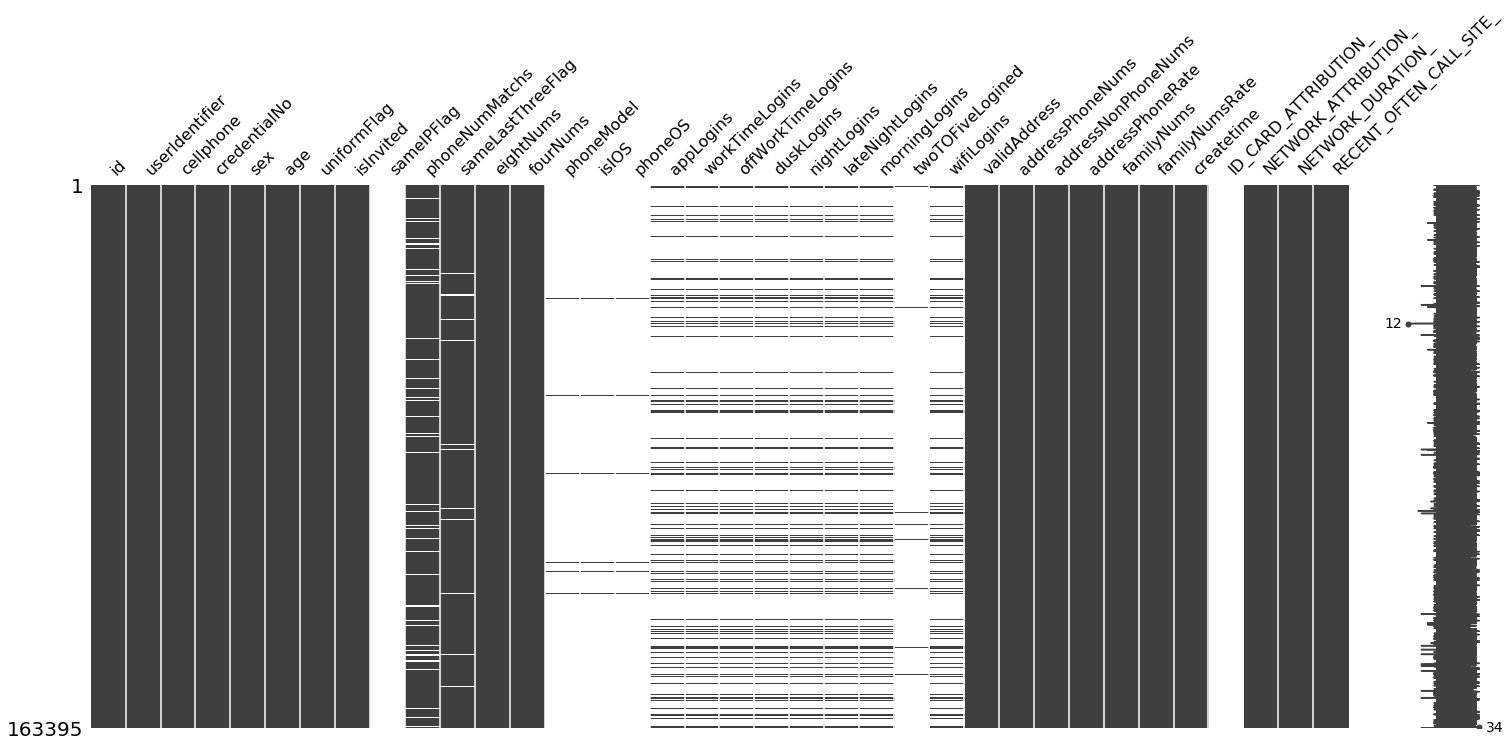

USER_IDENTIFIER_          163385
AVG(DIALING)              163385
AVG(DIALED)               163385
AVG(DIALING_COUNT_)       163385
DIALED_COUNT_             163385
avg_zhujiao               163384
avg_beijiao               163333
avg(TELEPHONE_CHARGE_)    163385
avg(SMS_COUNT_)           163385
yuqi                      163395
first_leadtime            163395
dtype: int64

In [1]:
import pandas as pd
operator_data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
import missingno as missingno
missingno.matrix(extention)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()

In [2]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M:%S").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

F:\anoconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
#两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


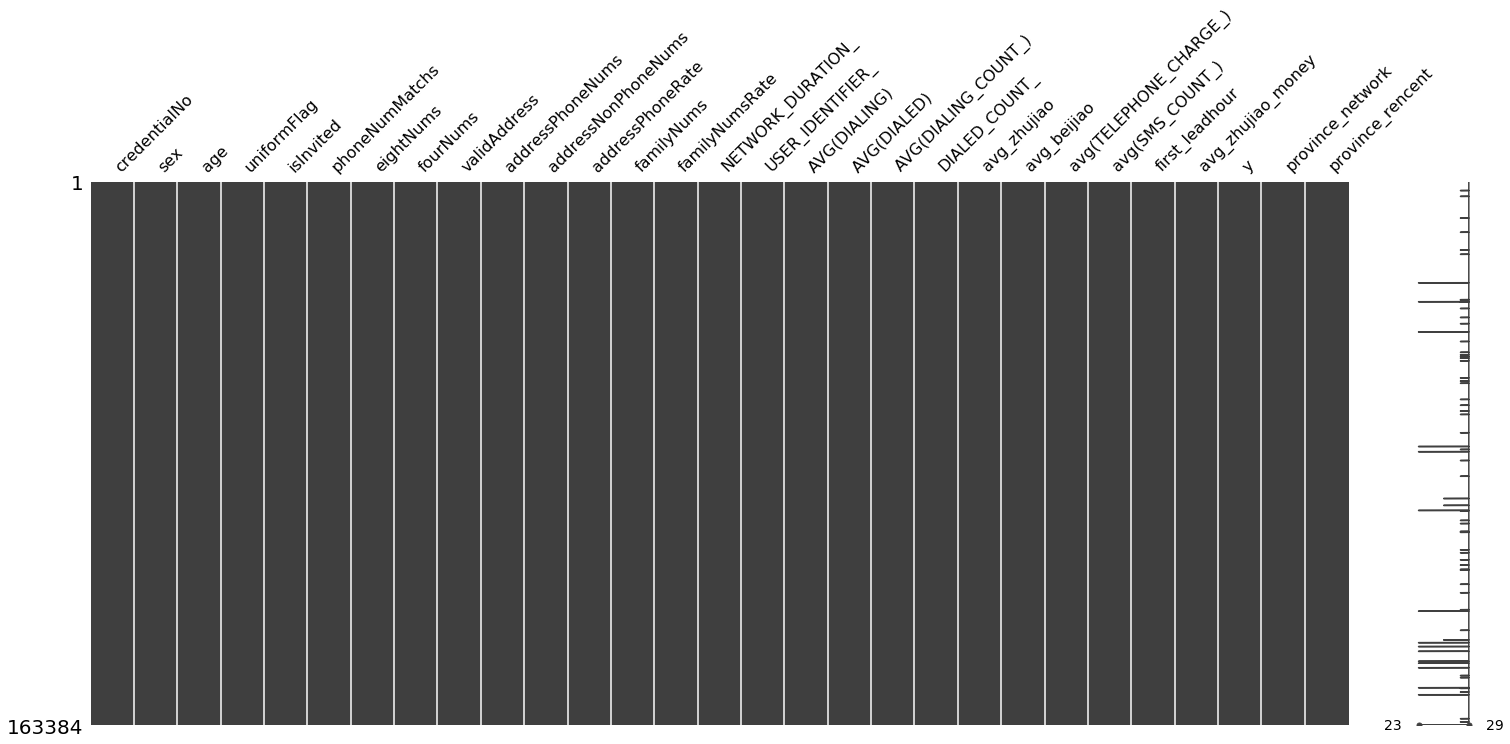

,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [4]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
first_data2

In [5]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2 =first_data2.dropna(axis=0)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


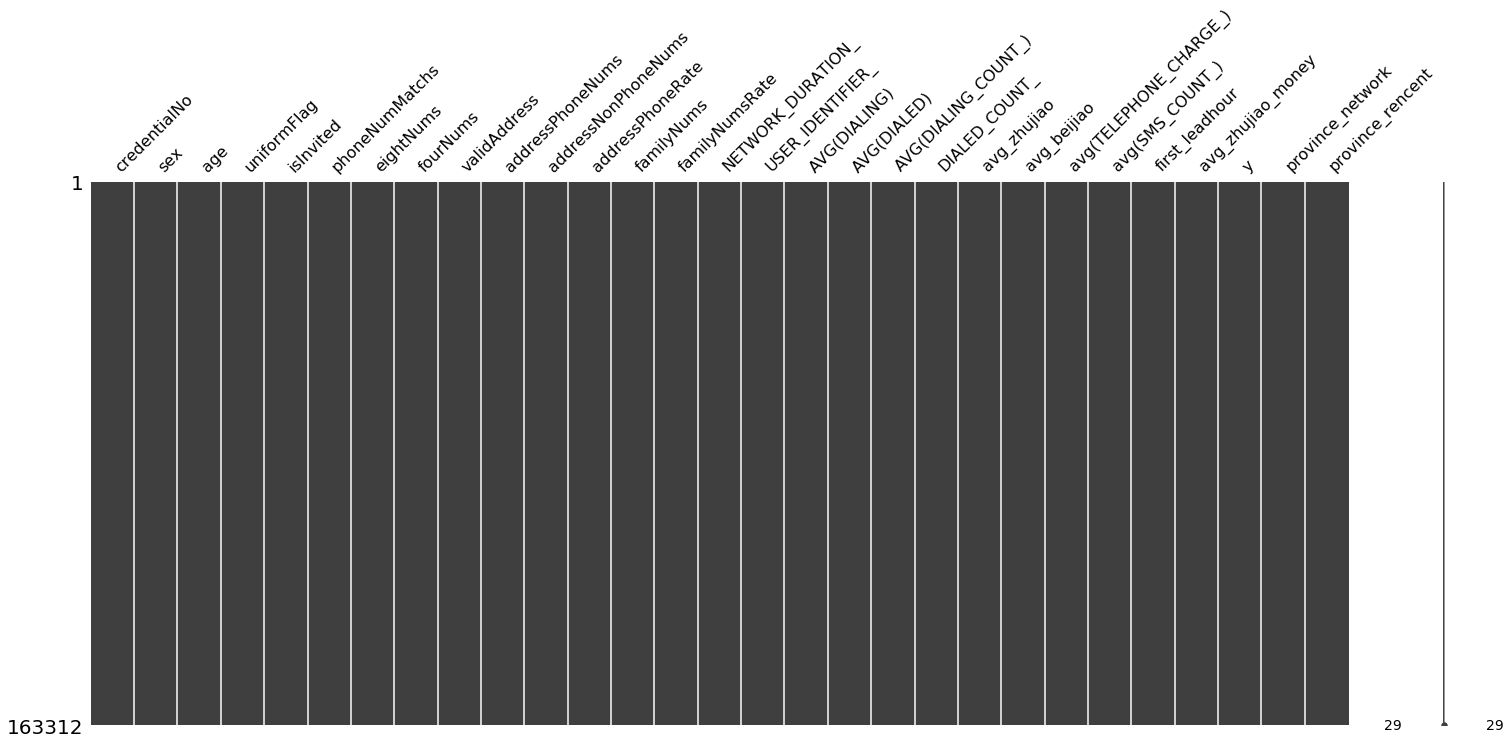

credentialNo              False
sex                       False
age                       False
uniformFlag               False
isInvited                 False
phoneNumMatchs            False
eightNums                 False
fourNums                  False
validAddress              False
addressPhoneNums          False
addressNonPhoneNums       False
addressPhoneRate          False
familyNums                False
familyNumsRate            False
NETWORK_DURATION_         False
USER_IDENTIFIER_          False
AVG(DIALING)              False
AVG(DIALED)               False
AVG(DIALING_COUNT_)       False
DIALED_COUNT_             False
avg_zhujiao               False
avg_beijiao               False
avg(TELEPHONE_CHARGE_)    False
avg(SMS_COUNT_)           False
first_leadhour            False
avg_zhujiao_money         False
y                         False
province_network          False
province_rencent          False
dtype: bool

In [6]:
missingno.matrix(first_data2)
first_data2.isnull().any()

### BP算法运用

In [7]:
X = first_data2
bpData = X[["sex","isInvited"]].as_matrix(columns=None)
y =X['y'].as_matrix(columns=None)
num_examples = len(bpData) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 1 # learning rate for gradient descent
reg_lambda = 0.1 # regularization strength

In [8]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = bpData.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [9]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [10]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
 
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    # Gradient descent. For each batch...
    for i in list(range(0, num_passes)):
 
        # Forward propagation
        z1 = bpData.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(bpData.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
 
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
 
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    return model

In [11]:
# model = build_model(3, print_loss=True)
# # # Plot the decision boundary
# plot_decision_boundary(lambda x: predict(model, x))
# plt.title("Decision Boundary for hidden layer size 3")
# plt.show()

### 许多机器学习库要求类别是整型数值。虽然sklearn中大部分Estimator都能自动将类别转为整型，我还是建议大家手动将类别进行转换。对类别进行编码，和上一节中转化序列特征很相似。但不同的是类别是无序的，所以我们可以从0开始赋整数值。sklearn中提供了LabelEncoder类来实现类别的转换

In [12]:
from sklearn.preprocessing import LabelEncoder  
class_le = LabelEncoder()  
y = class_le.fit_transform(X["province_network"].values)
# X["province_network"]=y

In [96]:
from sklearn.preprocessing import LabelEncoder  
class_le = LabelEncoder()
tensorInput = X
tensorInput["province_network"] = class_le.fit_transform(X["province_network"].values)
tensorInput["province_rencent"] = class_le.fit_transform(X["province_rencent"].values)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [206]:
tensorInput.to_csv(path_or_buf="F:\\Machine+Deep Learning\\tensorInput.csv")

In [15]:
from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.184029271
Epoch: 0002 cost= 0.665401600
Epoch: 0003 cost= 0.552833278
Epoch: 0004 cost= 0.498647728
Epoch: 0005 cost= 0.465508368
Epoch: 0006 cost= 0.442596157
Epoch: 0007 cost= 0.425563547
Epoch: 0008 cost= 0.412198722
Epoch: 0009 cost= 0.401406530
Epoch: 0010 cost= 0.392441930
Epoch: 0011 cost= 0.384804130
Epoch: 0012 cost= 0.378144962
Epoch: 0013 cost= 0.372425262
Epoch: 0014 cost= 0.367302076
Epoch: 0015 cost= 0.362731778
Epoch: 0016 cost= 0.358623409
Epoch: 0017 cost= 0.354875790
Epoch: 0018 cost= 0.351432069
Epoch: 0019 cost= 0.348328968
Epoch: 0020 cost= 0.345426808
Epoch: 0021 cost= 0.342711395
Epoch: 0022 cost= 0.340233987
Epoch: 0023 cost= 0.337917482
Epoch: 0024 cost= 0.335748572
Epoch: 0025 cost= 0.333707576
Optimization Finished!
Accuracy: 0.9136


In [111]:
tensorInput = tensorInput.drop(["USER_IDENTIFIER_","credentialNo"],axis=1)
tensorInput

ValueError: labels ['USER_IDENTIFIER_' 'credentialNo'] not contained in axis

In [209]:
tensorInput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163312 entries, 1 to 163384
Data columns (total 27 columns):
sex                       163312 non-null float64
age                       163312 non-null float64
uniformFlag               163312 non-null float64
isInvited                 163312 non-null float64
phoneNumMatchs            163312 non-null float64
eightNums                 163312 non-null float64
fourNums                  163312 non-null float64
validAddress              163312 non-null float64
addressPhoneNums          163312 non-null float64
addressNonPhoneNums       163312 non-null float64
addressPhoneRate          163312 non-null float64
familyNums                163312 non-null float64
familyNumsRate            163312 non-null float64
NETWORK_DURATION_         163312 non-null float64
AVG(DIALING)              163312 non-null float64
AVG(DIALED)               163312 non-null float64
AVG(DIALING_COUNT_)       163312 non-null float64
DIALED_COUNT_             163312 non-nu

In [214]:
import tensorflow as tf  
import pandas as pd

# 生成一个先入先出队列和一个QueueRunner,生成文件名队列  
filenames = ["F:\\Machine+Deep Learning\\tensorInput.csv"]
filename_queue = tf.train.string_input_producer(filenames, shuffle=False)
# 定义Reader
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)
# 定义Decoder  
record_defaults = [[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.]] 
# record_defaults = record_defaults=[["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"],["null"]]
col1, col2, col3, col4, col5, col6, col7, col8, col9, col10,col11, col12, col13, col14, col15,col16, col17, col18, col19, col20, col21, col22, col23, col24   = tf.decode_csv(value,record_defaults=record_defaults)  
features = tf.stack([ col1,col2, col3, col4, col7, col8, col9, col10,col11, col12, col13, col14, col15,col16, col17, col18, col19, col20, col23,col24])  
label = col21
example_batch, label_batch = tf.train.shuffle_batch([features,label], batch_size=2, capacity=200, min_after_dequeue=100, num_threads=2)  
# 运行Graph  
with tf.Session() as sess:  
    coord = tf.train.Coordinator()  #创建一个协调器，管理线程  
    threads = tf.train.start_queue_runners(coord=coord)  #启动QueueRunner, 此时文件名队列已经进队。  
    for i in range(10):  
        e_val,l_val = sess.run([example_batch, label_batch])  
        print (e_val,l_val)  
    coord.request_stop()  
    coord.join(threads)  

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>, Expect 27 fields but have 24 in record 0
	 [[Node: DecodeCSV_37 = DecodeCSV[OUT_TYPE=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT32, DT_INT32, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT32, DT_FLOAT, DT_INT32, DT_INT32, DT_INT32], field_delim=",", na_value="", use_quote_delim=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ReaderReadV2_40:1, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_5, DecodeCSV_37/record_defaults_5, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/record_defaults_0, DecodeCSV_37/

OutOfRangeError: RandomShuffleQueue '_1520_shuffle_batch_21/random_shuffle_queue' is closed and has insufficient elements (requested 2, current size 0)
	 [[Node: shuffle_batch_21 = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_FLOAT], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_21/random_shuffle_queue, shuffle_batch_21/n)]]

Caused by op 'shuffle_batch_21', defined at:
  File "F:\anoconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "F:\anoconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "F:\anoconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "F:\anoconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "F:\anoconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "F:\anoconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "F:\anoconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "F:\anoconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\anoconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "F:\anoconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "F:\anoconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "F:\anoconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\anoconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "F:\anoconda\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "F:\anoconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "F:\anoconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "F:\anoconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "F:\anoconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "F:\anoconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "F:\anoconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-214-ee1dc97973dd>", line 16, in <module>
    example_batch, label_batch = tf.train.shuffle_batch([features,label], batch_size=2, capacity=200, min_after_dequeue=100, num_threads=2)
  File "F:\anoconda\lib\site-packages\tensorflow\python\training\input.py", line 1287, in shuffle_batch
    name=name)
  File "F:\anoconda\lib\site-packages\tensorflow\python\training\input.py", line 838, in _shuffle_batch
    dequeued = queue.dequeue_many(batch_size, name=name)
  File "F:\anoconda\lib\site-packages\tensorflow\python\ops\data_flow_ops.py", line 475, in dequeue_many
    self._queue_ref, n=n, component_types=self._dtypes, name=name)
  File "F:\anoconda\lib\site-packages\tensorflow\python\ops\gen_data_flow_ops.py", line 2764, in _queue_dequeue_many_v2
    component_types=component_types, timeout_ms=timeout_ms, name=name)
  File "F:\anoconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "F:\anoconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "F:\anoconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): RandomShuffleQueue '_1520_shuffle_batch_21/random_shuffle_queue' is closed and has insufficient elements (requested 2, current size 0)
	 [[Node: shuffle_batch_21 = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_FLOAT], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_21/random_shuffle_queue, shuffle_batch_21/n)]]


<bound method Tensor.eval of <tf.Tensor 'ReaderReadV2_32:0' shape=() dtype=string>>


In [143]:
tensorInput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163312 entries, 1 to 163384
Data columns (total 27 columns):
sex                       163312 non-null float64
age                       163312 non-null float64
uniformFlag               163312 non-null float64
isInvited                 163312 non-null float64
phoneNumMatchs            163312 non-null float64
eightNums                 163312 non-null int64
fourNums                  163312 non-null int64
validAddress              163312 non-null float64
addressPhoneNums          163312 non-null float64
addressNonPhoneNums       163312 non-null float64
addressPhoneRate          163312 non-null float64
familyNums                163312 non-null float64
familyNumsRate            163312 non-null float64
NETWORK_DURATION_         163312 non-null float64
AVG(DIALING)              163312 non-null float64
AVG(DIALED)               163312 non-null float64
AVG(DIALING_COUNT_)       163312 non-null float64
DIALED_COUNT_             163312 non-null f

In [59]:
[[  0.224380327][  29.5843906][  0.531504115][  0.729138092][  12.6111839][  0.85188473][  0.585051925][  236.22557]
 [  223.85012][  12.373646][  94.5411463][  0.12030346][  0.0758203316][  63.1509197][  15050.2630][  14321.0672]
 [  172.611783][  193.168720][  91.9618478][  80.2130902][  18256.3064][  225.213552][  13.3467779][  1.98415915]
 [  0.0953695993][  15.5658617][  17.1407980]]

<tf.Tensor 'ReaderReadV2_1:0' shape=() dtype=string>

In [52]:
tensorInput.drop(["y"],axis=1).describe().iloc[1,].as_matrix(columns=None).reshape(-1,1)

array([[  2.24380327e-01],
       [  2.95843906e+01],
       [  5.31504115e-01],
       [  7.29138092e-01],
       [  1.26111839e+01],
       [  8.51884736e-01],
       [  5.85051925e-01],
       [  2.36225574e+02],
       [  2.23850127e+02],
       [  1.23736468e+01],
       [  9.45411463e+01],
       [  1.20303468e-01],
       [  7.58203316e-02],
       [  6.31509197e+01],
       [  1.50502630e+04],
       [  1.43210672e+04],
       [  1.72611783e+02],
       [  1.93168720e+02],
       [  9.19618478e+01],
       [  8.02130902e+01],
       [  1.82563064e+04],
       [  2.25213552e+02],
       [  1.33467779e+01],
       [  1.98415915e+00],
       [  1.55658617e+01],
       [  1.71407980e+01]])

In [154]:
tensorInput.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 27 columns):
sex                       8 non-null float64
age                       8 non-null float64
uniformFlag               8 non-null float64
isInvited                 8 non-null float64
phoneNumMatchs            8 non-null float64
eightNums                 8 non-null float64
fourNums                  8 non-null float64
validAddress              8 non-null float64
addressPhoneNums          8 non-null float64
addressNonPhoneNums       8 non-null float64
addressPhoneRate          8 non-null float64
familyNums                8 non-null float64
familyNumsRate            8 non-null float64
NETWORK_DURATION_         8 non-null float64
AVG(DIALING)              8 non-null float64
AVG(DIALED)               8 non-null float64
AVG(DIALING_COUNT_)       8 non-null float64
DIALED_COUNT_             8 non-null float64
avg_zhujiao               8 non-null float64
avg_beijiao               8 non-null float6

### 对tensorflow进行数据归一化

In [205]:
for i in tensorInput.columns:
    imax,imin = tensorInput[i].max(),tensorInput[i].min()
    tensorInput[i] = (tensorInput[i]-imin)*1.0/float((imax-imin)*1.0)

In [176]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tensorInput.drop(["y"],axis=1),tensorInput["y"],test_size=0.3)

F:\anoconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [183]:
trainIn,testIn = train_test_split(tensorInput,test_size=0.3)

,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,addressNonPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
103811,0.0,0.222222,0.0,1.0,0.043103,0.500000,0.000000,0.021581,0.021235,0.000717,...,0.081011,0.028976,0.030133,0.006147,0.001312,0.565217,0.003542,0.0,0.580645,0.555556
124363,0.0,0.444444,0.0,1.0,0.064655,0.000000,0.000000,0.067023,0.064138,0.004484,...,0.168215,0.019878,0.030654,0.020971,0.002020,0.304348,0.011563,0.0,0.387097,0.694444
56594,0.0,0.472222,1.0,0.0,0.012931,0.333333,0.166667,0.008903,0.007846,0.001435,...,0.037926,0.017386,0.032165,0.005491,0.002861,0.521739,0.014932,0.0,0.935484,0.916667
37415,0.0,0.166667,0.0,1.0,0.041429,0.000000,0.000000,0.011966,0.011229,0.001076,...,0.033024,0.036275,0.055940,0.011767,0.003544,0.652174,0.038363,0.0,0.580645,0.555556
1598,0.0,0.472222,1.0,0.0,0.017241,0.000000,0.000000,0.059117,0.048445,0.014078,...,0.012900,0.018816,0.032658,0.009649,0.000039,0.782609,0.019819,0.0,0.677419,0.444444
46588,0.0,0.250000,1.0,1.0,0.021552,0.000000,0.166667,0.013105,0.012885,0.000448,...,0.013416,0.071773,0.053622,0.004576,0.000051,0.695652,0.006128,0.0,0.161290,0.444444
101892,0.0,0.055556,1.0,0.0,0.051724,0.000000,0.166667,0.022436,0.022603,0.000090,...,0.038958,0.024063,0.051982,0.006716,0.000455,0.260870,0.004705,0.0,0.129032,0.111111
97304,0.0,0.111111,0.0,1.0,0.030172,0.166667,0.333333,0.007764,0.007774,0.000090,...,0.022704,0.010478,0.015169,0.008359,0.000156,0.608696,0.022499,0.0,0.129032,0.111111
126404,0.0,0.194444,0.0,1.0,0.043103,0.000000,0.000000,0.007194,0.006982,0.000359,...,0.045408,0.022446,0.031371,0.005964,0.002656,0.826087,0.003981,0.0,0.774194,0.777778
132044,0.0,0.111111,1.0,1.0,0.025862,0.166667,0.000000,0.010613,0.010726,0.000000,...,0.016770,0.009740,0.019278,0.007195,0.006215,0.086957,0.022196,0.0,0.612903,0.583333


In [216]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 27 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)
x_train,x_test,y_train,y_test
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = trainIn.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: testIn.drop(["y"],axis=1),
                                      Y: testIn["y"].labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


AttributeError: 'DataFrame' object has no attribute 'next_batch'

In [159]:
decode_idx1_ubyte("C:\\Users\\Administrator\\Desktop\\mnist\\t10k-images.idx3-ubyte")

NameError: name 'decode_idx1_ubyte' is not defined

In [160]:
import numpy as np
a = 10*np.random.random((5, 5)) # 新建5*5矩阵做演示
print(a)
print('---')
amin, amax = a.min(), a.max() # 求最大最小值
a = (a-amin)/(amax-amin) # (矩阵元素-最小值)/(最大值-最小值)
print(a)

[[ 7.89766399  5.2144879   8.18613973  3.17974843  4.76079391]
 [ 5.83487324  4.87235272  2.384145    0.83005931  5.15152545]
 [ 5.86686541  4.17191656  7.54876789  0.10401074  5.9872428 ]
 [ 4.87001322  6.85709577  6.13746187  4.46036173  8.7472426 ]
 [ 3.26271329  4.70422768  4.5743548   1.47408025  9.19168608]]
---
[[ 0.85760692  0.56235252  0.88935054  0.33845154  0.51242843]
 [ 0.63061919  0.52470426  0.25090402  0.07989376  0.55542419]
 [ 0.63413959  0.44762887  0.81921469  0.          0.64738581]
 [ 0.52444683  0.74310368  0.66391579  0.47936913  0.95109382]
 [ 0.34758092  0.50620393  0.49191283  0.15076127  1.        ]]


In [193]:
mnist.train

In [194]:
import numpy as np
import tensorflow as tf
arr = np.array([1, 5.5, 3, 15, 20])
tensor = tf.convert_to_tensor(arr,tf.float64)
sess = tf.Session()
print(sess.run(tensor))
print(sess.run(tensor[1]))
print(sess.run(mnist.train))

[  1.    5.5   3.   15.   20. ]
5.5


TypeError: Fetch argument <tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000329E7B70> has invalid type <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>, must be a string or Tensor. (Can not convert a DataSet into a Tensor or Operation.)